In [288]:
pwd

'C:\\Users\\K C Wong\\OneDrive\\Documents\\E-learning\\Coursera\\PROF CERT - IBM ML\\6\\Final Project\\Monthly Mean Temp of Malaysia 1901-2020'

In [289]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as ts

from statsmodels.tsa.stattools import kpss

import statsmodels.api as sm

import pmdarima as pm

import warnings
warnings.simplefilter(action='ignore')

###### https://climateknowledgeportal.worldbank.org/download-data

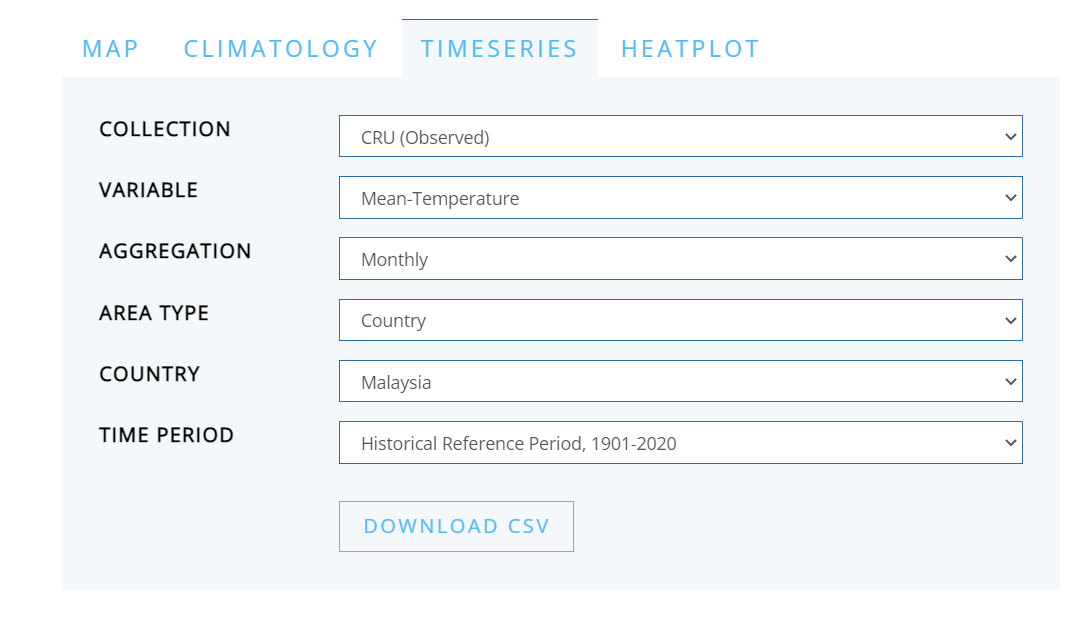

In [290]:
raw=pd.read_csv('tas_timeseries_monthly_cru_1901-2020_MYS.csv',
                 header=0,
                 skiprows=2,
                 names=['year', 'Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [291]:
raw

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,24.59,24.73,25.19,25.60,25.74,25.49,25.21,25.16,25.10,25.08,24.86,24.75
1,1902,24.55,24.61,25.18,25.59,25.74,25.53,25.21,25.17,25.09,25.10,24.86,24.83
2,1903,24.63,24.66,25.19,25.58,25.77,25.47,25.13,25.14,25.01,24.99,24.76,24.55
3,1904,24.40,24.53,25.09,25.39,25.59,25.42,25.16,25.07,25.12,24.98,24.71,24.60
4,1905,24.58,24.68,25.19,25.61,25.72,25.46,25.11,25.12,25.02,25.03,24.78,24.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,26.18,26.07,26.62,27.09,26.93,26.29,26.18,26.60,25.96,26.06,25.78,25.81
116,2017,25.71,25.37,25.64,26.06,26.42,26.07,26.39,25.81,25.78,25.86,25.57,25.52
117,2018,25.06,25.23,25.91,26.35,26.20,26.08,26.37,26.44,25.62,25.72,25.90,25.85
118,2019,25.95,25.87,26.32,26.85,26.88,26.44,26.20,26.29,26.15,25.67,25.86,25.58


In [292]:
raw.shape

(120, 13)

In [293]:
raw.isnull().sum()

year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

###### https://stackoverflow.com/questions/58959868/convert-monthly-data-table-to-seasonal-time-series-using-pandas

In [294]:
df0 = raw.melt(id_vars='year', var_name='month')

In [295]:
df0

,year,month,value
0,1901,Jan,24.59
1,1902,Jan,24.55
2,1903,Jan,24.63
3,1904,Jan,24.40
4,1905,Jan,24.58
...,...,...,...
1435,2016,Dec,25.81
1436,2017,Dec,25.52
1437,2018,Dec,25.85
1438,2019,Dec,25.58


In [296]:
# create a datatime column and set it as index
df0['date'] = pd.to_datetime(df0['year'].astype(str) + '-' + df0['month'])
df0.set_index('date', inplace=True)

In [297]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 1901-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1440 non-null   int64  
 1   month   1440 non-null   object 
 2   value   1440 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 45.0+ KB


In [298]:
df0

,year,month,value
date,,,
1901-01-01,1901,Jan,24.59
1902-01-01,1902,Jan,24.55
1903-01-01,1903,Jan,24.63
1904-01-01,1904,Jan,24.40
1905-01-01,1905,Jan,24.58
...,...,...,...
2016-12-01,2016,Dec,25.81
2017-12-01,2017,Dec,25.52
2018-12-01,2018,Dec,25.85


In [299]:
# sort the index
df0.sort_index(inplace=True)

In [300]:
df0

,year,month,value
date,,,
1901-01-01,1901,Jan,24.59
1901-02-01,1901,Feb,24.73
1901-03-01,1901,Mar,25.19
1901-04-01,1901,Apr,25.60
1901-05-01,1901,May,25.74
...,...,...,...
2020-08-01,2020,Aug,26.25
2020-09-01,2020,Sep,25.66
2020-10-01,2020,Oct,25.71


In [301]:
df0[['value']].describe().T

,count,mean,std,min,25%,50%,75%,max
value,1440.0,25.333083,0.493421,23.56,25.01,25.3,25.66,27.18


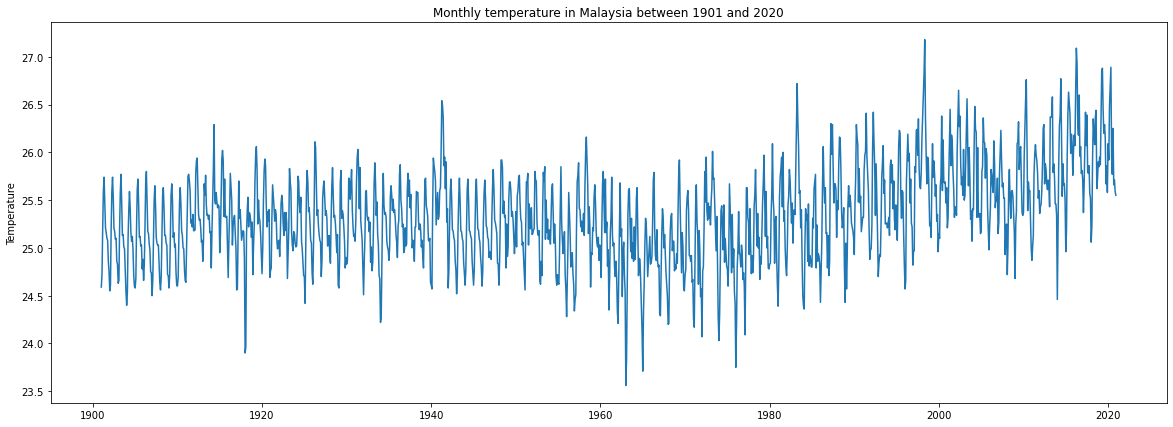

In [302]:
plt.figure(figsize=(20,7))
plt.plot(df0.index,df0['value'])
plt.ylabel('Temperature')
plt.title('Monthly temperature in Malaysia between 1901 and 2020');

In [303]:
# looki at data from 1960 onwards
df=df0[708:]
df

,year,month,value
date,,,
1960-01-01,1960,Jan,24.90
1960-02-01,1960,Feb,24.69
1960-03-01,1960,Mar,25.23
1960-04-01,1960,Apr,25.67
1960-05-01,1960,May,25.80
...,...,...,...
2020-08-01,2020,Aug,26.25
2020-09-01,2020,Sep,25.66
2020-10-01,2020,Oct,25.71


###### https://www.coursera.org/learn/time-series-survival-analysis/lecture/cyvD6/sarima-prophet-notebook-part-3
So you plot that out, we see that the variance actually changes throughout. So we're actually going to take the log of that to make sure that the variance is more constant, to ensure stationarity. And we see here that once we actually take the log goes values, we'll be working with a bit more stationary of data.

([<matplotlib.axis.XTick at 0x1a8911d1e08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

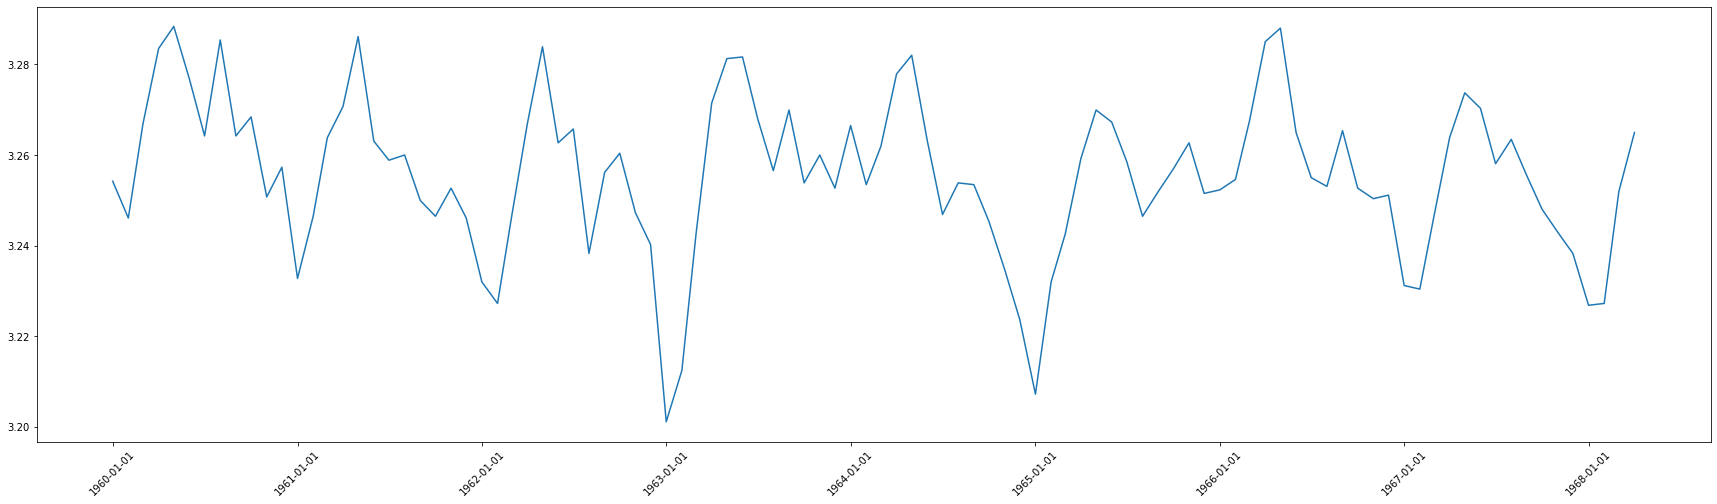

In [304]:
import numpy as np
#given the difference in variance we should probably take log of data
df['log_val'] = np.log1p(df['value'])
# going to zoom in on last 100 values to get a better idea of frequency of seasonality
plt.figure(figsize=(30,8))
#plt.rcParams['figure.figsize'] = [25, 15]
plt.plot(df['log_val'][:100])
plt.xticks(ticks = df.iloc[0:100:12].index,rotation=45)

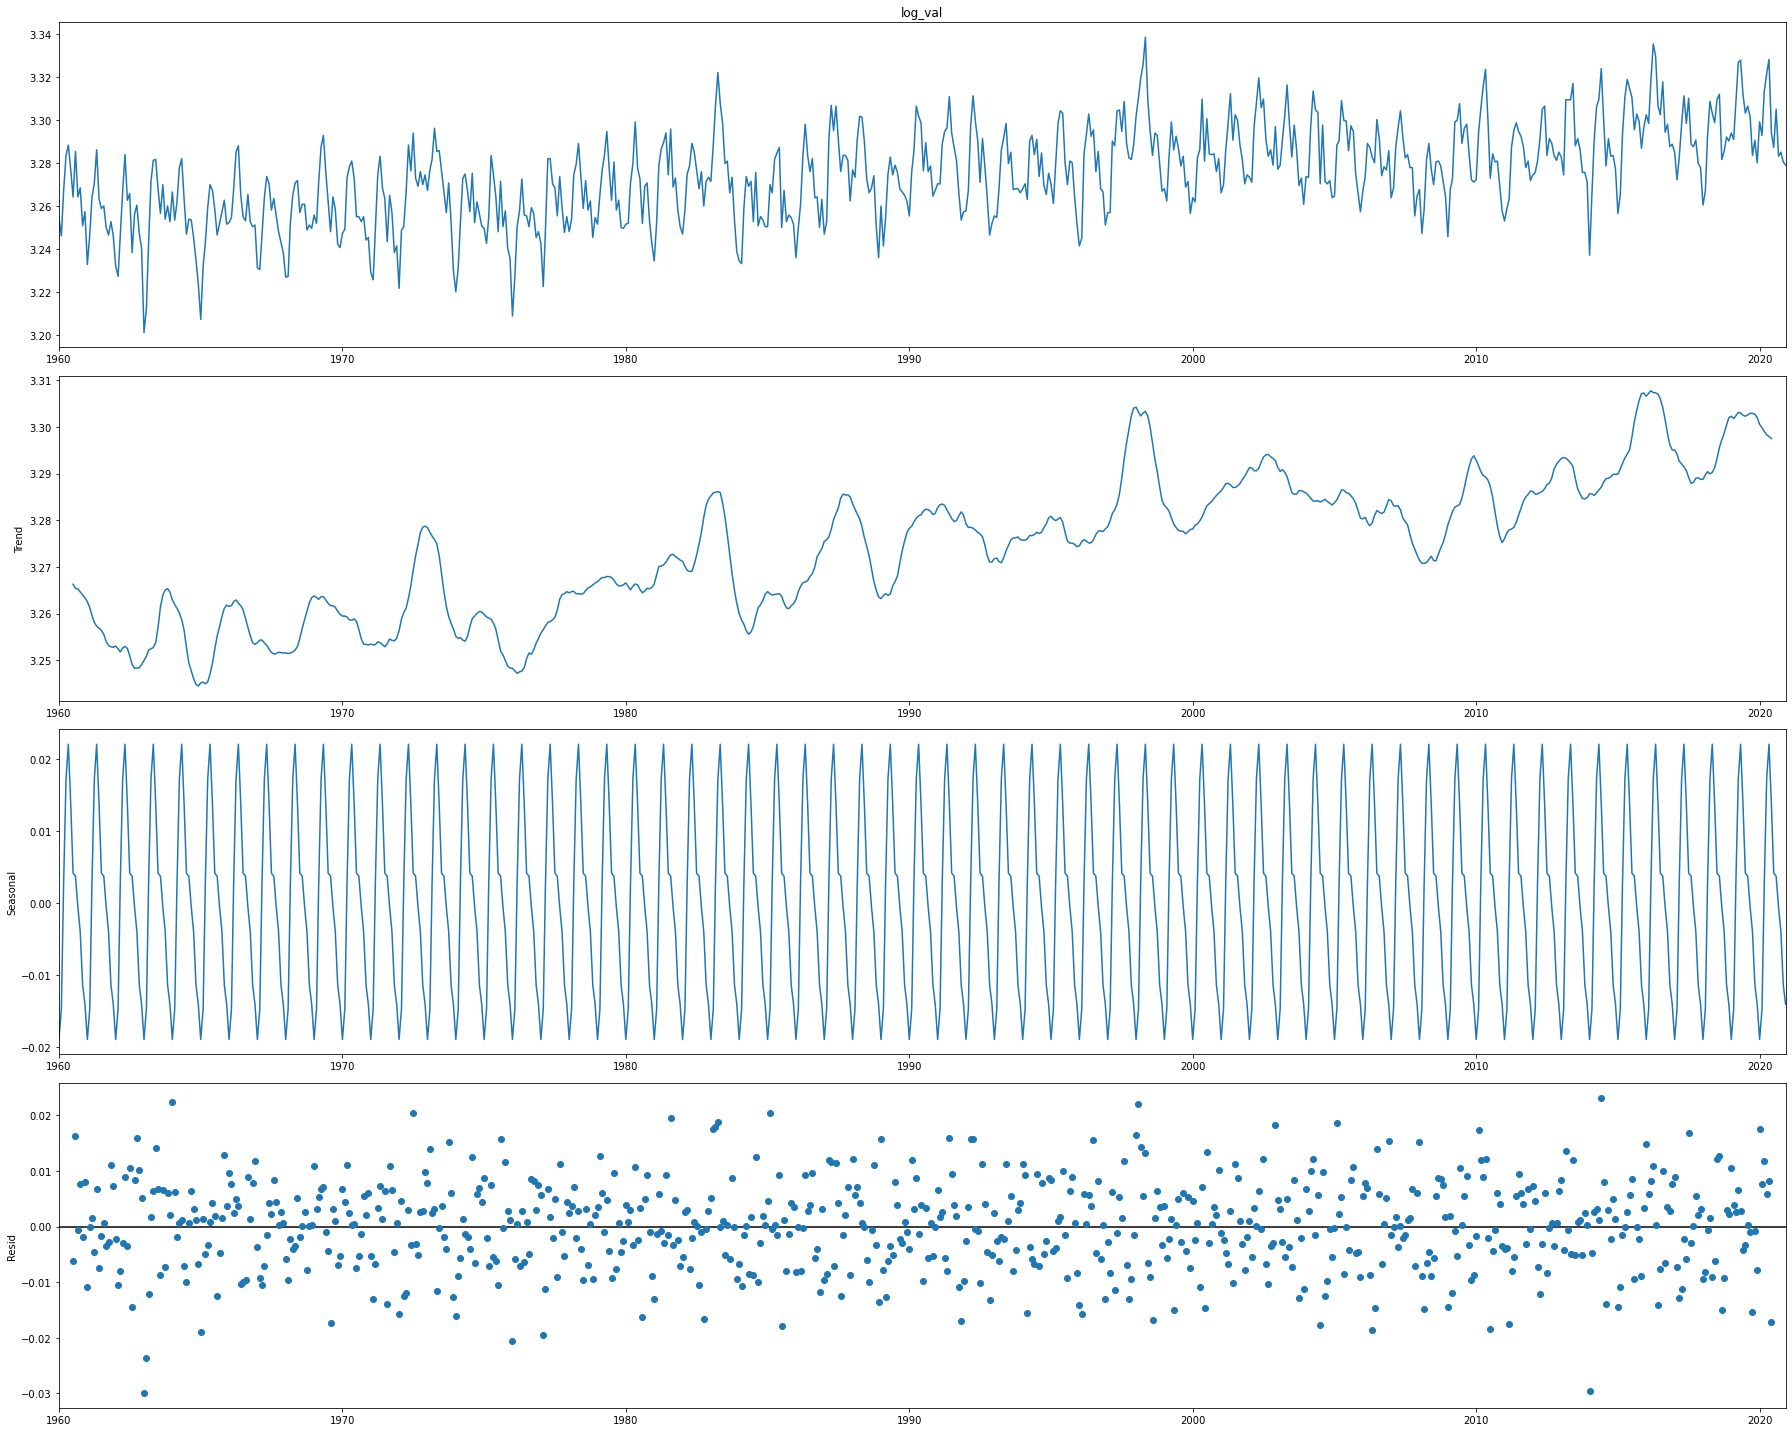

In [305]:
# plot decomposition with frequency 12
# Seems to do decent job of capturing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(df.log_val,freq=11).plot()
# https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
plt.rcParams['figure.figsize'] = [25, 20]
# https://www.coursera.org/learn/time-series-survival-analysis/discussions/weeks/3/threads/TrssUbTMEey2MQ4NRZADnw
# https://stackoverflow.com/questions/70377351/statsmodels-api-tsa-seasonal-decompose-plot-figsize
# else duplicated fig produced
seasonal_decomp12=seasonal_decompose(df.log_val,period=12)
seasonal_decomp12.plot()
plt.show()

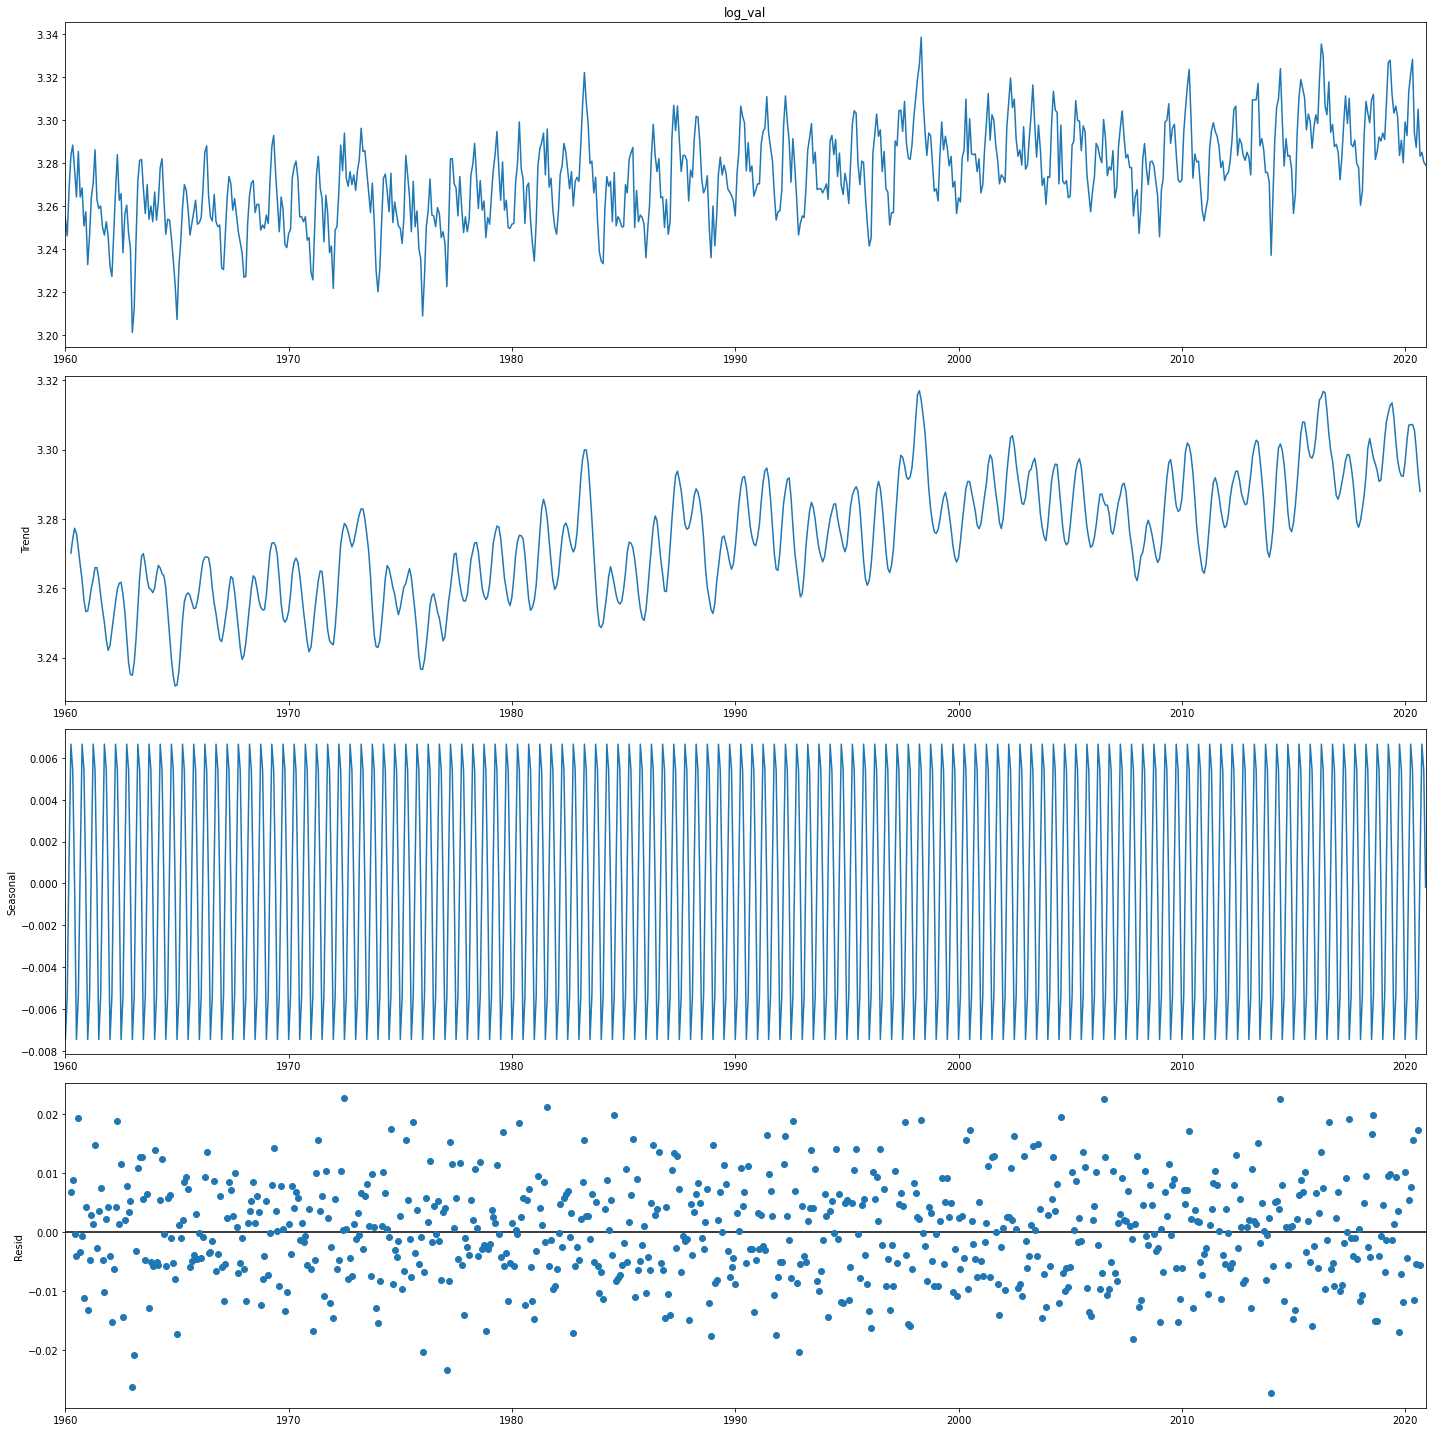

In [306]:
# plot decomposition with frequency 11
# Seems to do decent job of capturing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(df.log_val,freq=11).plot()
# https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
#plt.rcParams['figure.figsize'] = [25, 15]
plt.rc("figure",figsize=(20,20))
# https://www.coursera.org/learn/time-series-survival-analysis/discussions/weeks/3/threads/TrssUbTMEey2MQ4NRZADnw
# https://stackoverflow.com/questions/70377351/statsmodels-api-tsa-seasonal-decompose-plot-figsize
# else duplicated fig produced
seasonal_decomp6=seasonal_decompose(df.log_val,period=6)
seasonal_decomp6.plot()
plt.show()

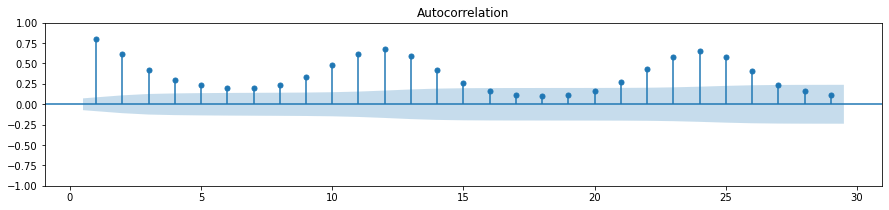

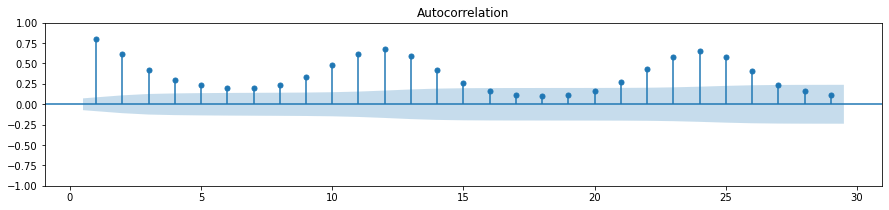

In [307]:
plt.rc("figure",figsize=(15,3))
sm.tsa.graphics.plot_acf(df['log_val'],zero=False)

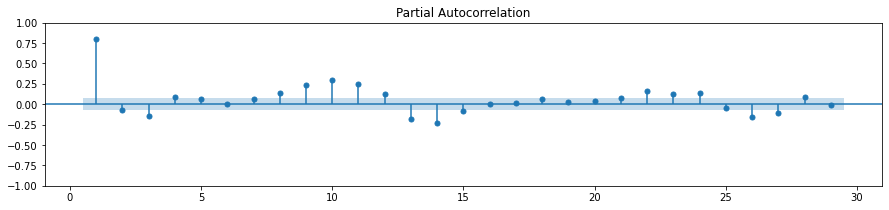

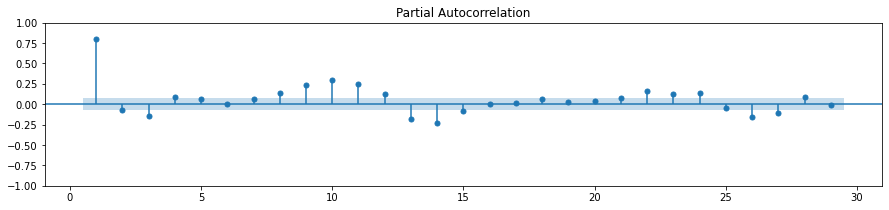

In [308]:
sm.tsa.graphics.plot_pacf(df['log_val'],zero=False)

In [309]:
df['lag_12']=df.log_val.shift(12)
df['seasonal_diff']=df.log_val-df['lag_12']

In [310]:
df

,year,month,value,log_val,lag_12,seasonal_diff
date,,,,,,
1960-01-01,1960,Jan,24.90,3.254243,NaN,NaN
1960-02-01,1960,Feb,24.69,3.246102,NaN,NaN
1960-03-01,1960,Mar,25.23,3.266904,NaN,NaN
1960-04-01,1960,Apr,25.67,3.283539,NaN,NaN
1960-05-01,1960,May,25.80,3.288402,NaN,NaN
...,...,...,...,...,...,...
2020-08-01,2020,Aug,26.25,3.305054,3.306520,-0.001467
2020-09-01,2020,Sep,25.66,3.283164,3.301377,-0.018213
2020-10-01,2020,Oct,25.71,3.285038,3.283539,0.001499


In [311]:
#df.to_csv('temperature_1960_2020.csv')

In [312]:
df2=df['seasonal_diff'].dropna()
df2

date
1961-01-01   -0.021464
1961-02-01    0.000389
1961-03-01   -0.003055
1961-04-01   -0.012830
1961-05-01   -0.002241
                ...   
2020-08-01   -0.001467
2020-09-01   -0.018213
2020-10-01    0.001499
2020-11-01   -0.010103
2020-12-01   -0.001129
Name: seasonal_diff, Length: 720, dtype: float64

In [313]:
df2=df['seasonal_diff'].dropna()
X=df2.values
result = ts.adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.940554
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


Here, the p value is less than 0.05, thus we reject the Null Hypothesis. Therefore, the series has a unit root and is stationary.

In [314]:
kpss(df2, regression='ct')

(0.015327214875316512,
 0.1,
 14,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [315]:
kpss(df2, regression='c')

(0.024387293480983348,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [316]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(df2)

Results of KPSS Test:
Test Statistic            0.024387
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


The p value of the KPSS test is more than 0.05. Thus, we will not reject the null hypothesis that the series is stationary. The KPSS test concludes that the series is stationary.

Both tests confirm that the given series is stationary.

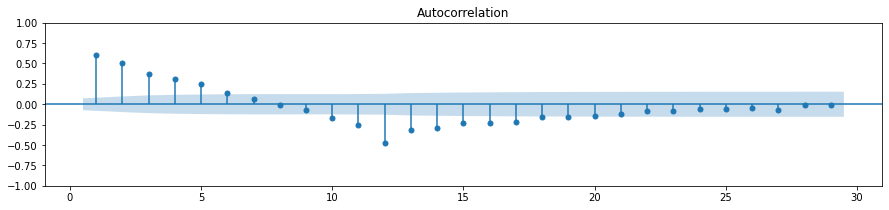

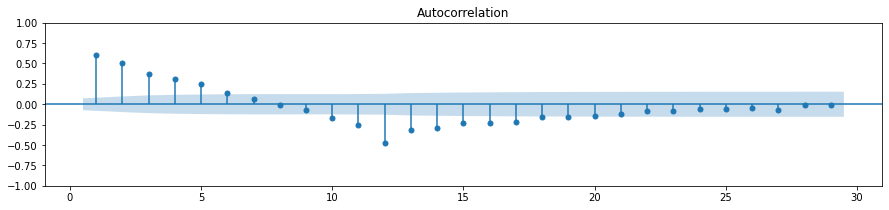

In [317]:
#plt.rc("figure",figsize=(15,3))
sm.tsa.graphics.plot_acf(df['seasonal_diff'].dropna(),zero=False)

MA(q)=MA()?

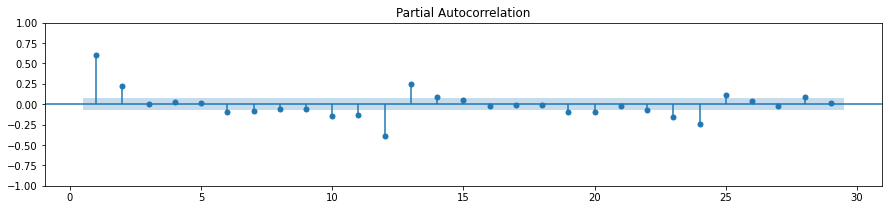

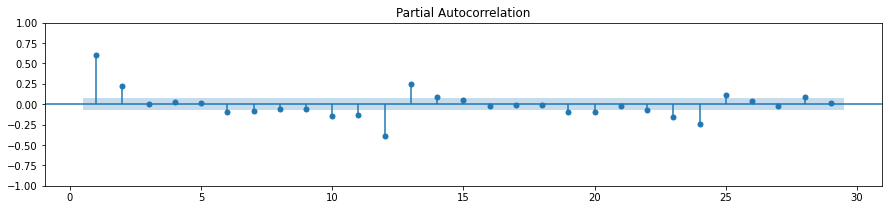

In [318]:
sm.tsa.graphics.plot_pacf(df['seasonal_diff'].dropna(),zero=False)

AR(p)=AR(1)?

ARIMA(p,d,q)

In [319]:
#sar3.plot_diagnostics(figsize = (15,8),lags = range(1,15));

# (1)

In [359]:
auto_model = pm.auto_arima(df["log_val"],start_p=1,start_q=1,
                        test='adf', #use adftest to find optimal 'd'
                        max_p=3,max_q=3,m=12, #frequency of series
                        start_P=0,seasonal=True,                        
                        d=0,D=1,trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-3843.390, Time=0.22 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-4357.759, Time=1.71 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-3844.737, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-4164.581, Time=0.31 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-4419.794, Time=3.54 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.84 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-4140.805, Time=0.97 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-4465.220, Time=3.94 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-4398.908, Time=1.78 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.49 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

In [360]:
print(auto_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  732
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                2317.031
Date:                                 Sun, 08 May 2022   AIC                          -4622.062
Time:                                         20:45:58   BIC                          -4594.587
Sample:                                              0   HQIC                         -4611.455
                                                 - 732                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   5.69e-05      3.530      0.000    8.93e-05       0

In [322]:
print('order: ',auto_model.order)
print('seasonal order: ',auto_model.seasonal_order)

order:  (2, 0, 0)
seasonal order:  (0, 1, 2, 12)


In [323]:
sar4 = sm.tsa.statespace.SARIMAX(df.log_val, 
                                order=(2,0,0), 
                                seasonal_order=(0,1,2,12), 
                                trend='c').fit()

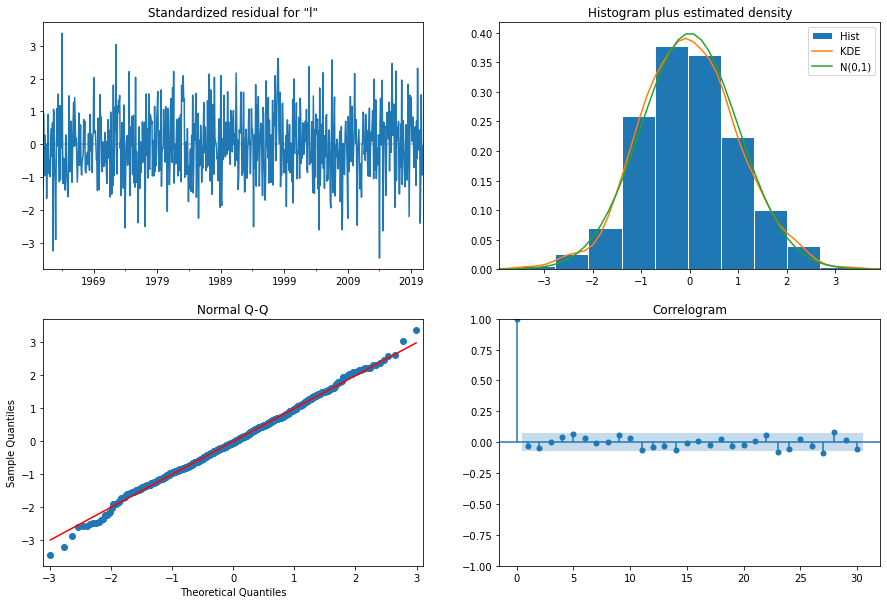

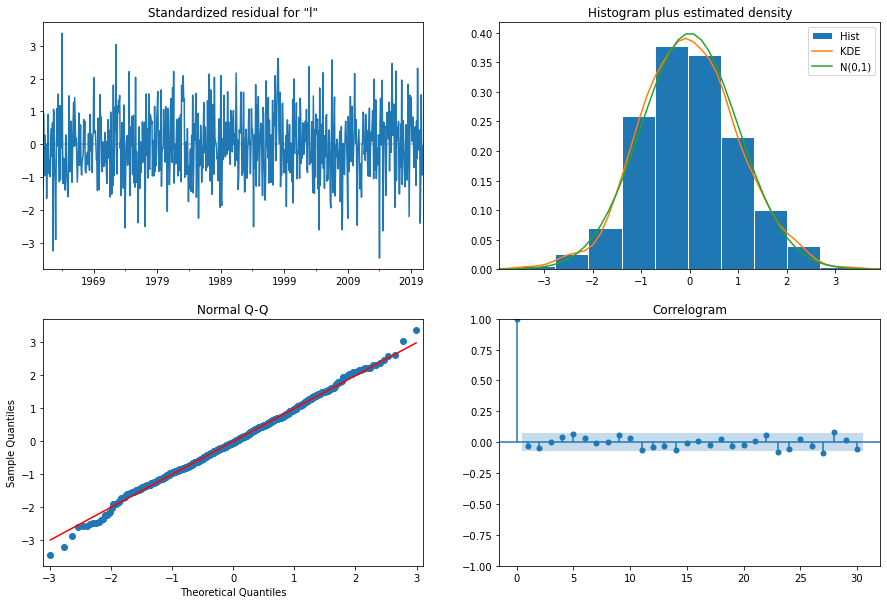

In [324]:
plt.rc("figure",figsize=(15,10))
sar4.plot_diagnostics(lags=30)

In [325]:
def cross_validate(series,horizon,start,step_size,order = (1,0,0),seasonal_order = (0,0,0,0),trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start,len(series)-horizon,step_size):
        model = sm.tsa.statespace.SARIMAX(series[:i+1], #only using data through to and including start 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                trend=trend).fit()
        fcst.append(model.forecast(steps = horizon)[-1]) #forecasting horizon steps into the future
        actual.append(series[i+horizon]) # comparing that to actual value at that point
        date.append(series.index[i+horizon]) # saving date of that value
    return pd.DataFrame({'fcst':fcst,'actual':actual},index=date)

In [326]:
warnings.filterwarnings("ignore")
series = df['log_val']
horizon = 3
start = int(len(df.value)*.75)
step_size = 1
order = auto_model.order
seasonal_order = auto_model.seasonal_order

log_cv1 = cross_validate(series,horizon,start,step_size,
                    order = order,
                    seasonal_order = seasonal_order)

In [327]:
log_cv1 = np.expm1(log_cv1)

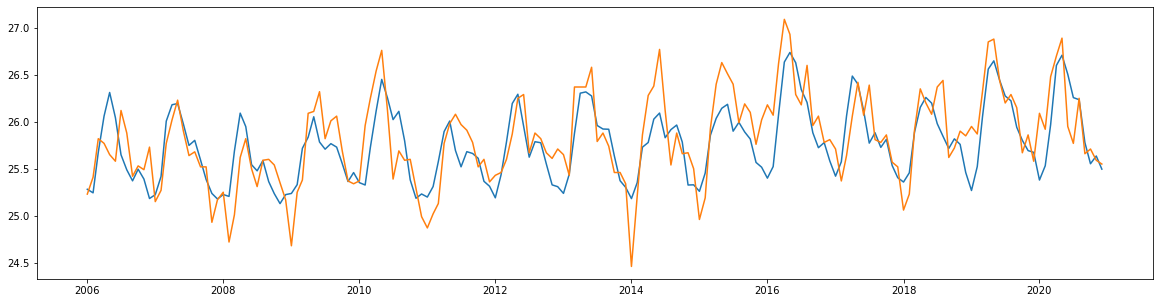

In [328]:
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(log_cv1)

<AxesSubplot:>

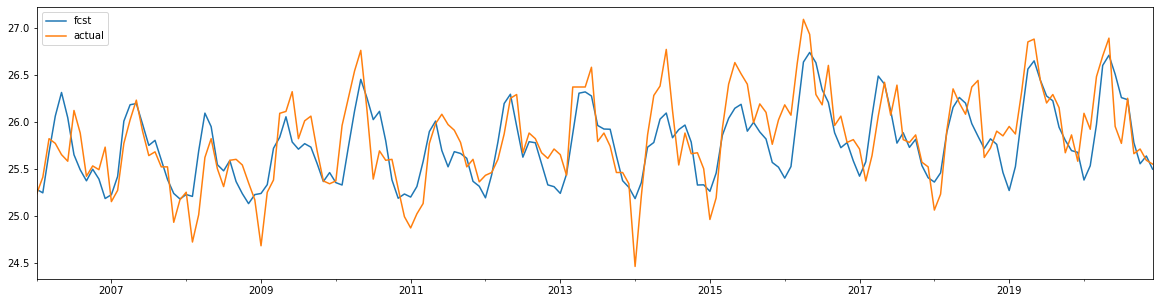

In [329]:
plt.rcParams['figure.figsize'] = [20, 5]
log_cv1.plot()

In [330]:
#Defining an error metric to see out of sample accuracy
def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()

In [331]:
mape(log_cv1)

0.009398345990894076

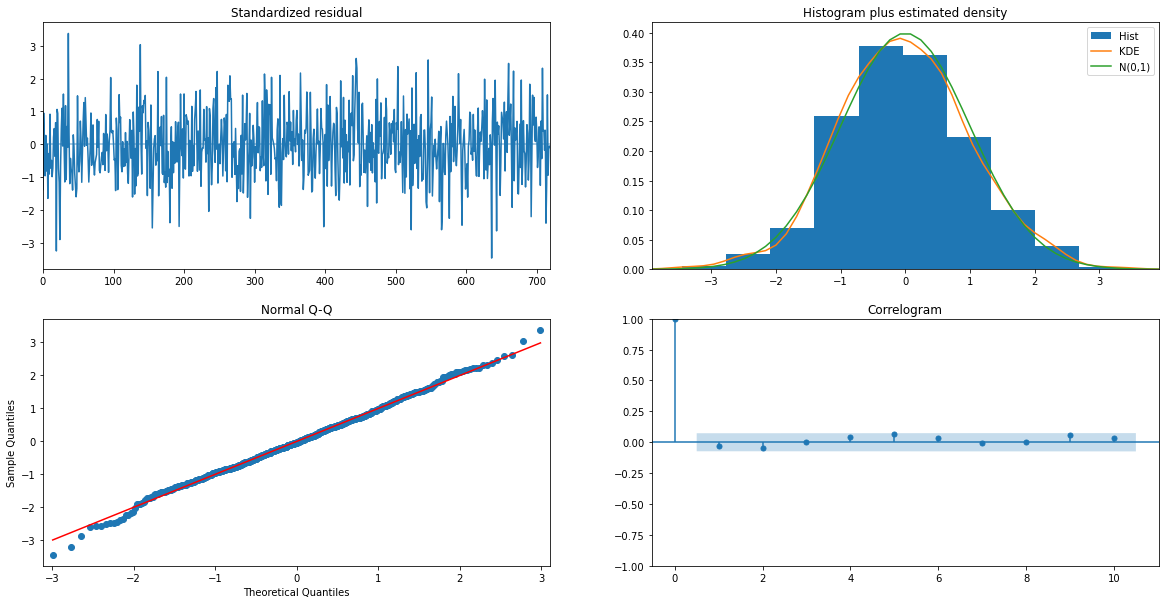

In [332]:
auto_model.plot_diagnostics(figsize = (20,10));

# 2)

In [358]:
# get the values of all columns in separate lists.
# https://www.geeksforgeeks.org/get-a-list-of-a-particular-column-values-of-a-pandas-dataframe/
'''
foo=pd.read_csv('temperature_1960_2020.csv')
for i in list(foo):
    
    # show the list of values  
    print(foo[i].tolist())
'''

['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01', '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01', '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01', '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01', '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01', '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01', '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01', '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01', '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01', '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01', '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01', '1965-09-01', '1965-10-01', '1965-11-01', '1965

# Facebook Prophet

In [188]:
from fbprophet import Prophet

In [218]:
#fb['ds']=df.index_values()
#fb['y']=df['log_val']
fbp_df=df[['log_val']].copy()
fbp_df.reset_index(inplace=True)
fbp_df

,date,log_val
0,1960-01-01,3.254243
1,1960-02-01,3.246102
2,1960-03-01,3.266904
3,1960-04-01,3.283539
4,1960-05-01,3.288402
...,...,...
727,2020-08-01,3.305054
728,2020-09-01,3.283164
729,2020-10-01,3.285038
730,2020-11-01,3.280535


In [219]:
fbp_df.rename(columns={"date": "ds", "log_val": "y"},inplace=True)
fbp_df

,ds,y
0,1960-01-01,3.254243
1,1960-02-01,3.246102
2,1960-03-01,3.266904
3,1960-04-01,3.283539
4,1960-05-01,3.288402
...,...,...
727,2020-08-01,3.305054
728,2020-09-01,3.283164
729,2020-10-01,3.285038
730,2020-11-01,3.280535


In [220]:
model_fbp = Prophet()
model_fbp

In [221]:
model_fbp.fit(fbp_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model_fbp.predict()

### a) AUTO_ARIMA

In [68]:
auto_arima = pm.auto_arima(df["value"],start_p=1,start_q=1,
                        test='adf', #use adftest to find optimal 'd'
                        max_p=3,max_q=3,m=12, #frequency of series
                        start_P=0,seasonal=True,                        
                        d=None,D=0,trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=404.473, Time=2.56 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2055.130, Time=0.20 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=212.833, Time=2.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=861.582, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13397.569, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=654.083, Time=0.36 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=59.893, Time=5.00 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=35.142, Time=5.86 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=96.024, Time=2.42 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=71.133, Time=6.37 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=110.378, Time=5.14 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=140.694, Time=6.61 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=139.067, Time=6.88 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   :

##### https://towardsdatascience.com/introduction-to-time-series-forecasting-part-2-arima-models-9f47bf0f476b

In [26]:
X = df['value'].values
result = ts.adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.026827
p-value: 0.274936
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Here, the p value is greater than 0.05, thus we fail to reject the Null Hypothesis. Therefore, the series has a unit root and is non stationary.

In [97]:
kpss(df['value'].values, regression='ct')

(1.0823944258099598,
 0.01,
 15,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [98]:
kpss(df['value'].values, regression='c')

(2.9829505230932973,
 0.01,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [29]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(df['value'].values)

Results of KPSS Test:
Test Statistic            2.982951
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\K C Wong\.conda\envs\pycaret_env\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Here, the p value is less than 0.05. However, the Null Hypothesis of KPSS test is opposite of the ADF test. Thus here, we will reject the Null Hypothesis of stationary series and conclude that the series is non stationary.

Both tests confirm that the given series is non stationary. We will now consider steps to make the series stationary.

In [32]:
df['value_diff'] = df['value'] - df['value'].shift(12)
df[['value','value_diff']].head(15)

,value,value_diff
date,,
1901-01-01,24.59,NaN
1901-02-01,24.73,NaN
1901-03-01,25.19,NaN
1901-04-01,25.60,NaN
1901-05-01,25.74,NaN
1901-06-01,25.49,NaN
1901-07-01,25.21,NaN
1901-08-01,25.16,NaN
1901-09-01,25.10,NaN


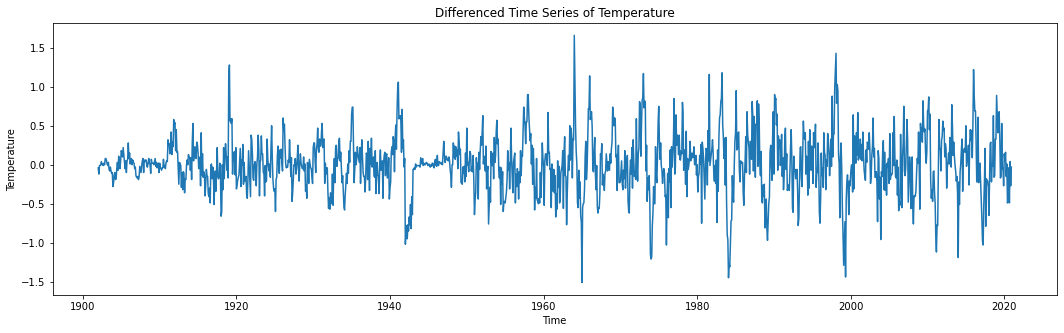

In [34]:
plt.figure(figsize=(18,5));
plt.xlabel('Time');
plt.ylabel('Temperature');
plt.title('Differenced Time Series of Temperature');
plt.plot(df['value_diff']);

The series looks nearly stationary, though the variance is not constant. We will run the two tests again to confirm stationarity.

In [36]:
# ADF Test: 
X = df['value_diff'].dropna().values
result = ts.adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.368794
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Here, the p value is less than 0.05. Thus, we will reject the Null Hypothesis and conclude that the series is stationary.

In [37]:
# KPSS Test 
kpss_test(X)

Results of KPSS Test:
Test Statistic            0.032214
p-value                   0.100000
Lags Used                21.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\K C Wong\.conda\envs\pycaret_env\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [102]:
kpss(X, regression='c')

(0.03221367267454299,
 0.1,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [103]:
kpss(X, regression='ct')

(0.012556903853106179,
 0.1,
 21,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

The p value of the KPSS test is more than 0.05. Thus, we will not reject the null hypothesis that the series is stationary. The KPSS test concludes that the series is stationary.

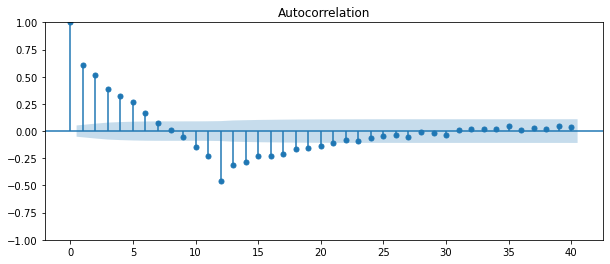

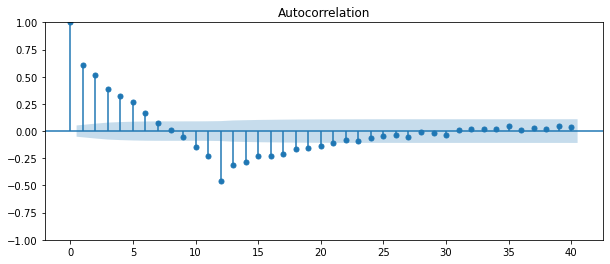

In [75]:
plt.rcParams['figure.figsize'] = [10, 4]
#acf_plot = sm.tsa.graphics.plot_acf(df['value_diff'].dropna(), lags= 40)
sm.tsa.graphics.plot_acf(df['value_diff'].dropna(), lags= 40)

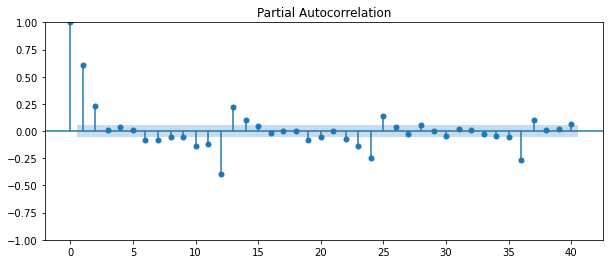

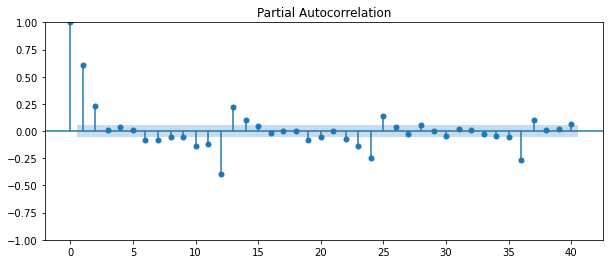

In [95]:
#pacf_plot = sm.tsa.graphics.plot_pacf(df['value_diff'].dropna(), lags= 40)
sm.tsa.graphics.plot_pacf(df['value_diff'].dropna(), lags= 40)

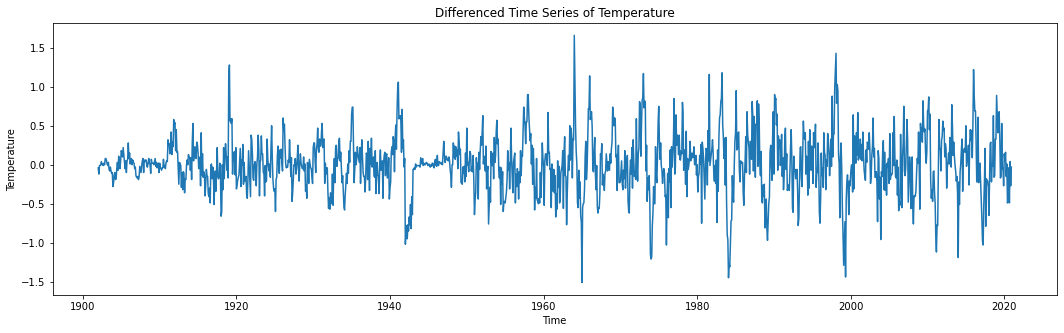

In [61]:
plt.figure(figsize=(18,5));
plt.xlabel('Time');
plt.ylabel('Temperature');
plt.title('Differenced Time Series of Temperature');
plt.plot(df['value_diff']);

In [62]:
import pmdarima as pm
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
df3 = df['value']

In [168]:
model = pm.auto_arima(df3,start_p=0,start_q=0,
                      test='adf', #use adftest to find optimal 'd'
                      max_p=3,max_q=3,m=12, #frequency of series
                      start_P=0,start_Q=0,seasonal=True,
                      d=None, # let model determine 'd'
                      D=1,trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1212.296, Time=0.42 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=200.845, Time=2.97 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=105.651, Time=2.87 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1210.923, Time=0.17 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=832.526, Time=0.85 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=107.363, Time=4.63 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=107.334, Time=4.73 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=485.912, Time=2.58 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=109.005, Time=19.15 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=508.235, Time=2.68 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.77 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=-110.052, Time=5.20 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=623.954, Time=1.07 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=-109.480, Time=7.18 sec
 ARIMA(0,0,2)(0,1,2)[12] interce

In [169]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1440
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood                  97.924
Date:                              Sat, 07 May 2022   AIC                           -183.848
Time:                                      12:44:17   BIC                           -152.264
Sample:                                           0   HQIC                          -172.053
                                             - 1440                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0071      0.002      4.278      0.000       0.004       0.010
ma.L1          0.49

##### https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/

According to the model summary, the model meets the condition of independence in the residuals (no correlation) because the p-value of the Ljung-Box test (Prob(Q)) is greater than 0.05, so we cannot reject the null hypothesis of independence, but we cannot say that the residual distribution is homoscedastic (constant variance) because the p-value of the Heteroskedasticity test (Prob(H)) is smaller than 0.05.

In [170]:
df3

date
1901-01-01    24.59
1901-02-01    24.73
1901-03-01    25.19
1901-04-01    25.60
1901-05-01    25.74
              ...  
2020-08-01    26.25
2020-09-01    25.66
2020-10-01    25.71
2020-11-01    25.59
2020-12-01    25.55
Name: value, Length: 1440, dtype: float64

In [174]:
train = df3[:1380] #1901-2015
test = df3[1381:] #2016-

from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train,order=(0,0,3),seasonal_order=(0,1,1,12))
#final_model = SARIMAX(train,order=(3,1,0),seasonal_order=(2,1,0,12))
result = final_model.fit()
print(result.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                 1380
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood                 113.065
Date:                              Sat, 07 May 2022   AIC                           -216.130
Time:                                      12:45:11   BIC                           -190.024
Sample:                                  01-01-1901   HQIC                          -206.360
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4920      0.022     21.931      0.000       0.448       0.536
ma.L2          0.42

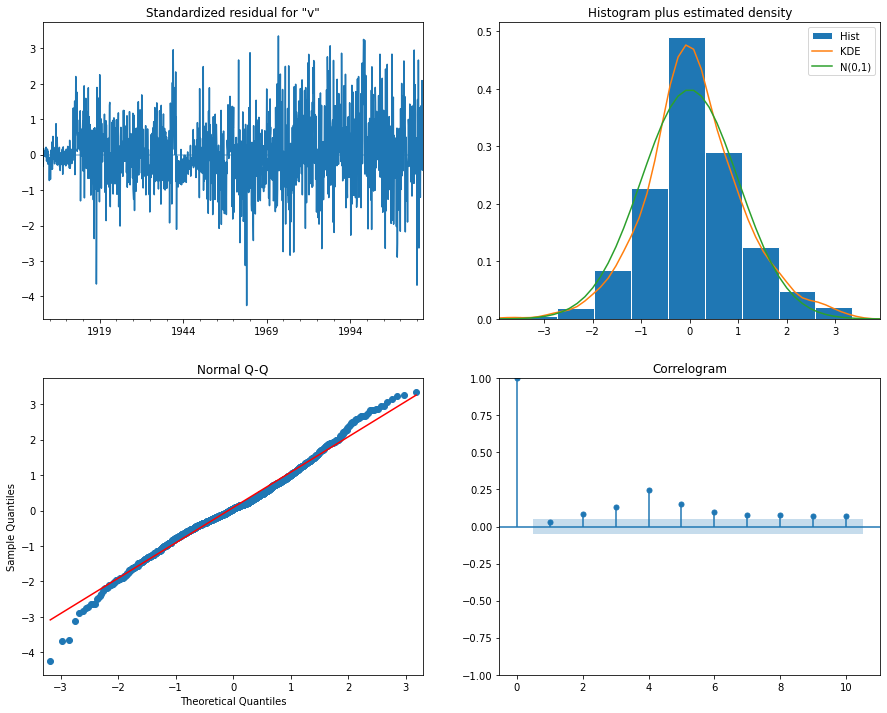

In [175]:
result.plot_diagnostics(figsize=(15, 12));

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Temperature')]

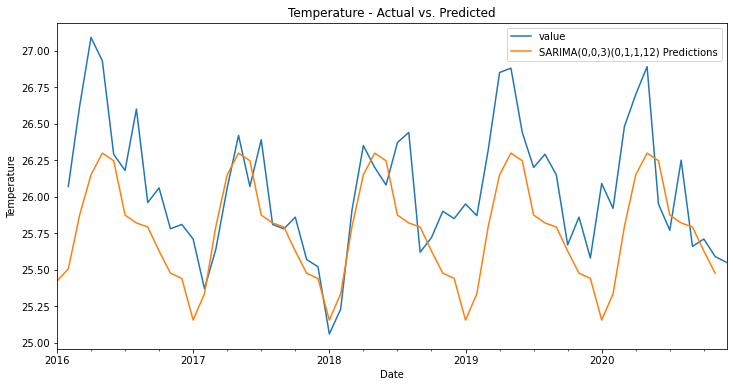

In [176]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,0,3)(0,1,1,12) Predictions')
#predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,0)(2,1,0,12) Predictions')
# Plot predictions against known values
title = 'Temperature - Actual vs. Predicted'
ylabel='Temperature'
xlabel='Date'

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

##### https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [87]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=819.365, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13397.569, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11444.112, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=821.313, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=820.035, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9630.889, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=582.826, Time=1.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=449.218, Time=1.36 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=814.935, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=815.476, Time=1.51 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=816.986, Time=1.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=575.862, Time=2.49 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Tot

In [88]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1440
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -218.609
Date:                Fri, 06 May 2022   AIC                            449.218
Time:                        17:22:08   BIC                            480.853
Sample:                             0   HQIC                           461.027
                               - 1440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.7005      0.007    362.864      0.000       2.686       2.715
ar.L2         -2.6651      0.015   -179.202      0.000      -2.694      -2.636
ar.L3          0.9645      0.008    121.695      0.0

##### https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

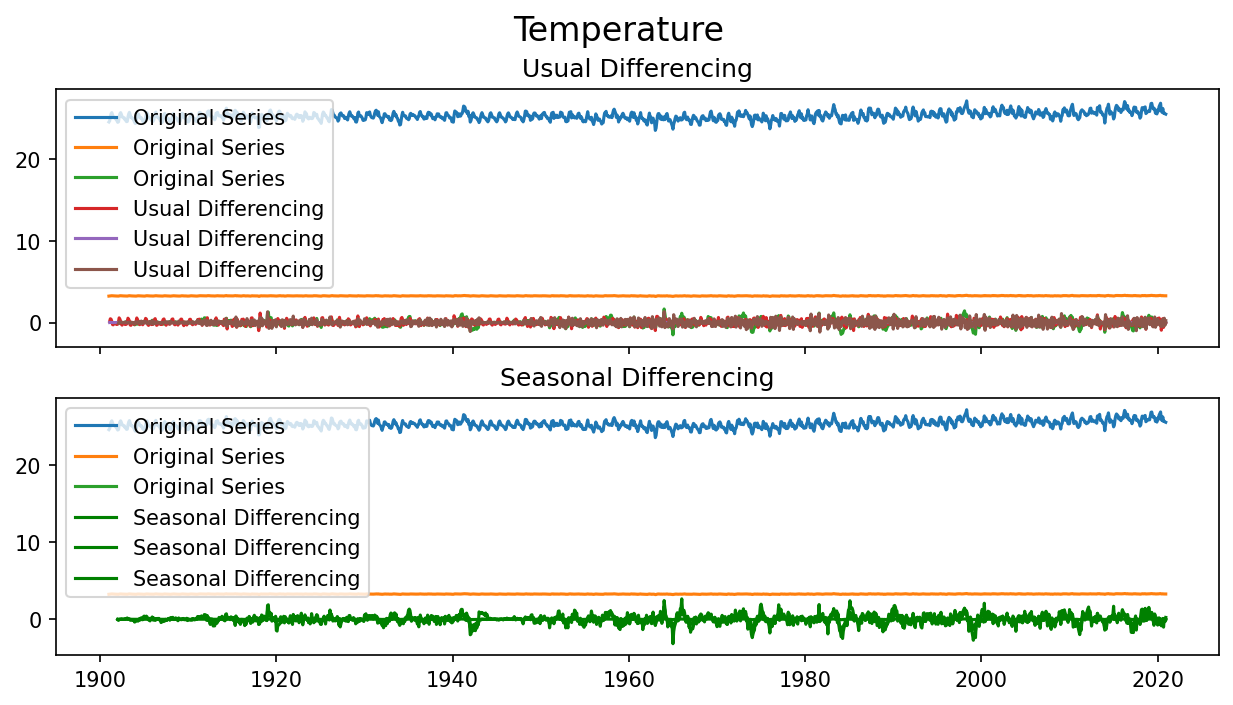

In [86]:
data=df.copy()

data.drop(['year','month'], axis = 1, inplace = True)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=150, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Temperature', fontsize=16)
plt.show()